In [1]:
import modules.vae_nn_images
import modules.savefolders
import resources.sinusoidal
from mpl_toolkits.mplot3d import axes3d, Axes3D
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import win32api
%matplotlib inline

## Data generation

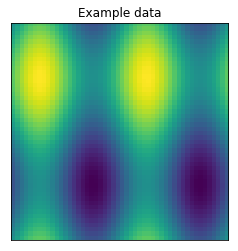

In [3]:
n_T = 50 # Dimension of sinusoidal data
omega_values = [2*np.pi, 4*np.pi] # Angular frequency of signals
phases1 = np.array(2*np.pi*np.linspace(0, 1, n_T))
phases2 = np.copy(phases1)
_, phase_images = resources.sinusoidal.sinusoid_image_phase_combination(phases1, phases2, n_T, omega_values)

# PLOT THE DATA TO VISUALIZE IT ONLY FOR n_Phi = 100
%matplotlib inline 
plt.imshow(phase_images[0,:,:])
plt.title("Example data")
plt.xticks([])
plt.yticks([])
plt.show()

In [4]:
experiment_name = '2DSimpleDecoder' # Code for the experiment
extra_comments ='Normal3' # Extra comments of the experiment 
target_folder = "C:\\Users\\Luis Pérez\\Documents\\Master\\TUE\\Final Project\\TensorFlow Models"
print("Tensorboard adress: {}".format(win32api.GetShortPathName(target_folder+'\\models\\'+experiment_name)))
folders = modules.savefolders.SaveFolders(target_folder, experiment_name, extra_comments)
log_dir_tensorboard = folders.get_logdir_tensorboard()
weights_folder = folders.get_weight_file()

Tensorboard adress: C:\Users\LUISPR~1\DOCUME~1\Master\TUE\FINALP~1\TENSOR~1\models\2DSIMP~1
Tensorboard address to copy paste:

C:\Users\LUISPR~1\DOCUME~1\Master\TUE\FINALP~1\TENSOR~1\models\2DSIMP~1\TENSOR~1


In [5]:
# Instantiate the VAE class
vae_parameters = {'latent_dim':3,
                  'mode':{'encoder':'Normal'},
                 'learning_rate':0.0001,
                 'shape':(50,50)}
vae = modules.vae_nn_images.vae_nn_images(**vae_parameters)

Normal distribution chosen as encoder


In [6]:
vae_training_parameters = {'train_data':phase_images,
                          'batch_size':2500,
                          'epochs': 500,
                          'log_dir_tensorboard': log_dir_tensorboard,
                          'weights_folder': weights_folder}
vae.train_vae(**vae_training_parameters)

Initialization complete
Initializing parameters
Epoch 0 | Loss: 2.04E-02 | MSE: 2.00E-02 | KL: 3.78E-04
Epoch 1 | Loss: 2.01E-02 | MSE: 2.00E-02 | KL: 6.30E-05
Epoch 2 | Loss: 2.01E-02 | MSE: 2.00E-02 | KL: 6.81E-05
Epoch 3 | Loss: 2.01E-02 | MSE: 2.00E-02 | KL: 9.67E-05
Epoch 4 | Loss: 2.01E-02 | MSE: 2.00E-02 | KL: 1.02E-04
Epoch 5 | Loss: 2.01E-02 | MSE: 2.00E-02 | KL: 1.03E-04
Epoch 6 | Loss: 2.01E-02 | MSE: 2.00E-02 | KL: 1.07E-04
Epoch 7 | Loss: 2.01E-02 | MSE: 2.00E-02 | KL: 1.12E-04
Epoch 8 | Loss: 2.01E-02 | MSE: 2.00E-02 | KL: 1.13E-04
Epoch 9 | Loss: 2.01E-02 | MSE: 1.99E-02 | KL: 1.11E-04
Epoch 10 | Loss: 2.00E-02 | MSE: 1.99E-02 | KL: 1.09E-04
Epoch 11 | Loss: 2.00E-02 | MSE: 1.99E-02 | KL: 1.06E-04
Epoch 12 | Loss: 2.00E-02 | MSE: 1.99E-02 | KL: 1.02E-04
Epoch 13 | Loss: 2.00E-02 | MSE: 1.99E-02 | KL: 9.79E-05
Epoch 14 | Loss: 2.00E-02 | MSE: 1.99E-02 | KL: 9.60E-05
Epoch 15 | Loss: 1.99E-02 | MSE: 1.98E-02 | KL: 1.01E-04
Epoch 16 | Loss: 1.99E-02 | MSE: 1.98E-02 | KL: 1.

## Test decoding

In [7]:
from itertools import product
latent = vae.encode(phase_images, weights_folder)
phase_combinations = np.array(list(product(phases1, phases2)))

In [ ]:
%matplotlib qt5

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = Axes3D(fig)
# Get colormap
colormap = mpl.cm.get_cmap('gray')
colors_linspace = np.linspace(0,1,100+1)
x_direction = 2
y_direction = 0
z_direction = 1
phase_dir = 0
for num_phase, phase in enumerate(phases1):
    ax.scatter(latent[phase_combinations[:,phase_dir]==phase,x_direction], 
                   latent[phase_combinations[:,phase_dir]==phase,y_direction],
                   latent[phase_combinations[:,phase_dir]==phase,z_direction],
                   c=colormap(colors_linspace[num_phase]))
    ax.set_xlabel('Z'+str(x_direction))
    ax.set_ylabel('Z'+str(y_direction))
    ax.set_zlabel('Z'+str(z_direction))
#     ax.legend()
fig.show()

In [ ]:
%matplotlib qt5

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = Axes3D(fig)
# Get colormap
colormap = mpl.cm.get_cmap('gray')
colors_linspace = np.linspace(0,1,100+1)
x_direction = 2
y_direction = 0
z_direction = 1
phase_dir = 1
for num_phase, phase in enumerate(phases1):
    ax.scatter(latent[phase_combinations[:,phase_dir]==phase,x_direction], 
                   latent[phase_combinations[:,phase_dir]==phase,y_direction],
                   latent[phase_combinations[:,phase_dir]==phase,z_direction],
                   c=colormap(colors_linspace[num_phase]))
    ax.set_xlabel('Z'+str(x_direction))
    ax.set_ylabel('Z'+str(y_direction))
    ax.set_zlabel('Z'+str(z_direction))
#     ax.legend()
fig.show()